In [1]:
!pip install graphviz
!pip install nbformat
!pip install dtreeviz

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('notebook')
sns.set_style('dark')

import dtreeviz

In [4]:
training = pd.read_csv("drive/MyDrive/Cap2/UNSW_NB15_training-set.csv")
testing = pd.read_csv("drive/MyDrive/Cap2/UNSW_NB15_testing-set.csv")
print("training ",training.shape)
print("testing ",testing.shape)

training  (82332, 45)
testing  (175341, 45)


In [5]:
all(training.columns == testing.columns)

True

In [6]:
df = pd.concat([training,testing]).drop('id',axis=1)
df = df.reset_index(drop=True)
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,...,1,3,0,0,0,2,3,0,Normal,0


In [7]:
df.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                257673 non-null  float64
 1   proto              257673 non-null  object 
 2   service            257673 non-null  object 
 3   state              257673 non-null  object 
 4   spkts              257673 non-null  int64  
 5   dpkts              257673 non-null  int64  
 6   sbytes             257673 non-null  int64  
 7   dbytes             257673 non-null  int64  
 8   rate               257673 non-null  float64
 9   sttl               257673 non-null  int64  
 10  dttl               257673 non-null  int64  
 11  sload              257673 non-null  float64
 12  dload              257673 non-null  float64
 13  sloss              257673 non-null  int64  
 14  dloss              257673 non-null  int64  
 15  sinpkt             257673 non-null  float64
 16  di

In [9]:
df.attack_cat.unique()

array(['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic'],
      dtype=object)

In [10]:
for col in ['proto', 'service', 'state']:
    df[col] = df[col].astype('category').cat.codes

df['attack_cat'] = df['attack_cat'].astype('category')

In [11]:
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,119,0,5,2,0,496,0,90909.0902,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,119,0,5,2,0,1762,0,125000.0003,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,119,0,5,2,0,1068,0,200000.0051,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,119,0,5,2,0,900,0,166666.6608,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,119,0,5,2,0,2126,0,100000.0025,254,...,1,3,0,0,0,2,3,0,Normal,0


Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Normal                0
Name: attack_cat, dtype: int64


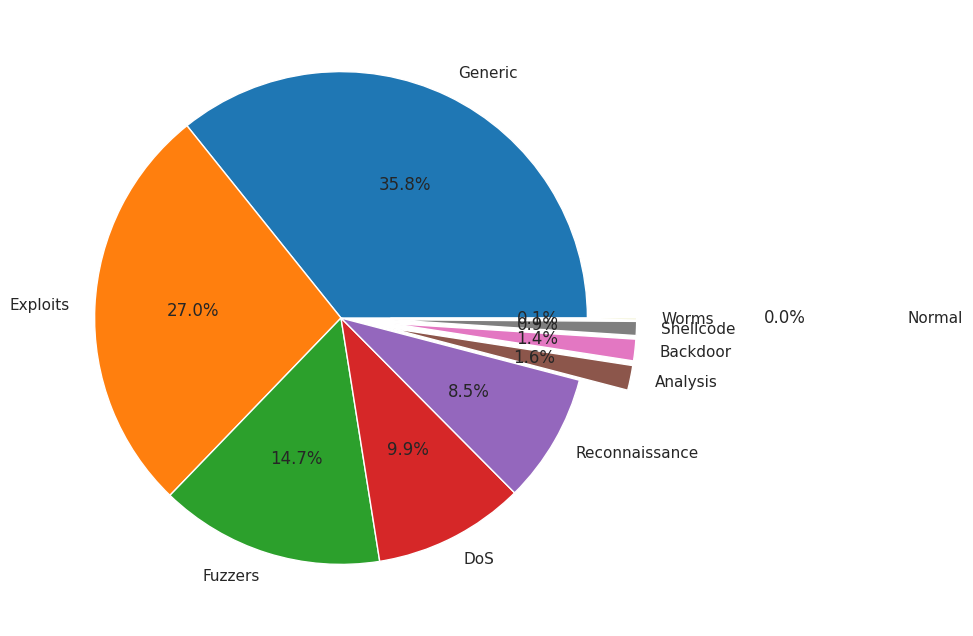

In [12]:
import matplotlib.pyplot as plt
validAttacks = df[df['label']==1]['attack_cat'].value_counts()
print(validAttacks)

plt.figure(figsize = (15,8))
plt.pie(validAttacks,labels = validAttacks.index, autopct = '%1.1f%%',explode = [0,0,0,0,0,0.2,0.2,0.2,0.2,1.2])
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['attack_cat', 'label'])
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

feature_names = list(X.columns)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("Feature Names:", feature_names)


X_train shape: (180371, 42)
y_train shape: (180371,)
X_test shape: (77302, 42)
y_test shape: (77302,)
Feature Names: ['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports']


In [14]:
import numpy as np

# Assuming y_train is a NumPy array
missing_values = np.isnan(y_train)

print("Number of missing values:", np.sum(missing_values))

import numpy as np

# Assuming y_train is a NumPy array with missing values
missing_values = np.isnan(y_train)

# Calculate the mean of non-missing values
mean_value = np.mean(y_train[~missing_values])

# Impute missing values with the mean
y_train[missing_values] = mean_value

print("Missing values imputed.")


Number of missing values: 0
Missing values imputed.


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

dt = DecisionTreeClassifier()

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best recall score:", grid_search.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best recall score: 1.0


In [16]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

clf=grid_search.best_estimator_
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

Recall:  1.0


:::::::> The RULES FOR HIGH RECALL RATE <::::::: 
 |--- sttl <= 61.00
|   |--- sinpkt <= 0.00
|   |   |--- class: 1
|   |--- sinpkt >  0.00
|   |   |--- class: 0
|--- sttl >  61.00
|   |--- synack <= 0.04
|   |   |--- class: 1
|   |--- synack >  0.04
|   |   |--- class: 1



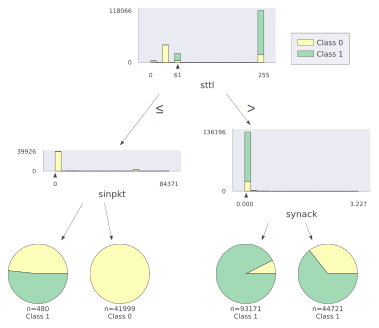

In [17]:
from sklearn.tree import export_text
import dtreeviz

print(":::::::> The RULES FOR HIGH RECALL RATE <::::::: \n" ,export_text(clf,feature_names=feature_names))

viz_model = dtreeviz.model(clf,
                           X_train=X_train, y_train=y_train,
                           feature_names=feature_names)
viz_model.view()

In [18]:
X_test = X_test.reset_index(drop=True)

rules= "(sttl <= 61.00 & sinpkt<= 0.00) | (sttl >  61.00 )"

ind = X_test.query(rules).index

X_test_2 = X_test.loc[ind,:]
y_test_2 = y_test[ind]

print(X_test.shape)
print(X_test_2.shape)
print("filtered data" , (1- np.round(X_test_2.shape[0] / X_test.shape[0],2))*100, "%")

(77302, 42)
(59425, 42)
filtered data 23.0 %


In [19]:
from sklearn.metrics import accuracy_score, precision_score

In [20]:
def model_evaluation(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test_2)

    accuracy = accuracy_score(y_test_2, y_pred)
    recall = recall_score(y_test_2, y_pred)
    precision = precision_score(y_test_2, y_pred)
    print("Recall: ", recall)
    print("Precision: ", precision)
    print("Accuracy: ", accuracy)

    cross = pd.crosstab(pd.Series(y_test_2, name='Actual'), pd.Series(y_pred, name='Predicted'))
    plt.figure(figsize=(5, 5))
    sns.heatmap(cross, annot=True, fmt='d', cmap="YlGnBu")
    plt.show()
    return {'Recall' : recall}



In [21]:
results = {}

Recall:  0.9571815389589395
Precision:  0.9647257693326001
Accuracy:  0.9351956247370635


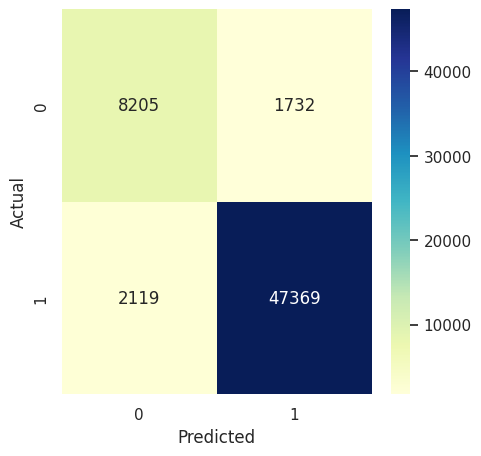

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=11)

results['Random Forest Model'] = model_evaluation(rf)

In [23]:
from sklearn.tree import export_text
feature_names = list(X.columns)

print(export_text(rf.estimators_[99],feature_names=feature_names))

|--- dpkts <= 0.50
|   |--- ct_srv_src <= 2.50
|   |   |--- sbytes <= 53.00
|   |   |   |--- sinpkt <= 30000.02
|   |   |   |   |--- sbytes <= 26.00
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- sbytes >  26.00
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- sinpkt >  30000.02
|   |   |   |   |--- class: 0.0
|   |   |--- sbytes >  53.00
|   |   |   |--- rate <= 0.11
|   |   |   |   |--- sbytes <= 62.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- sbytes >  62.50
|   |   |   |   |   |--- sttl <= 143.00
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- sttl >  143.00
|   |   |   |   |   |   |--- ct_src_dport_ltm <= 1.50
|   |   |   |   |   |   |   |--- sinpkt <= 5037.05
|   |   |   |   |   |   |   |   |--- ct_srv_dst <= 1.50
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- ct_srv_dst >  1.50
|   |   |   |   |   |   |   |   |   |--- sbytes <= 803.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
| 

In [24]:
! pip install xgboost

Recall:  0.9512811186550275
Precision:  0.9661378701746465
Accuracy:  0.9316617585191418


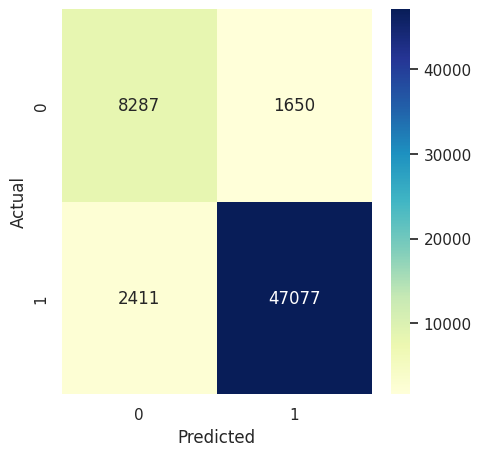

In [25]:
from xgboost import XGBClassifier

xgbc = XGBClassifier()

results['XGBoost Classifier'] = model_evaluation(xgbc)

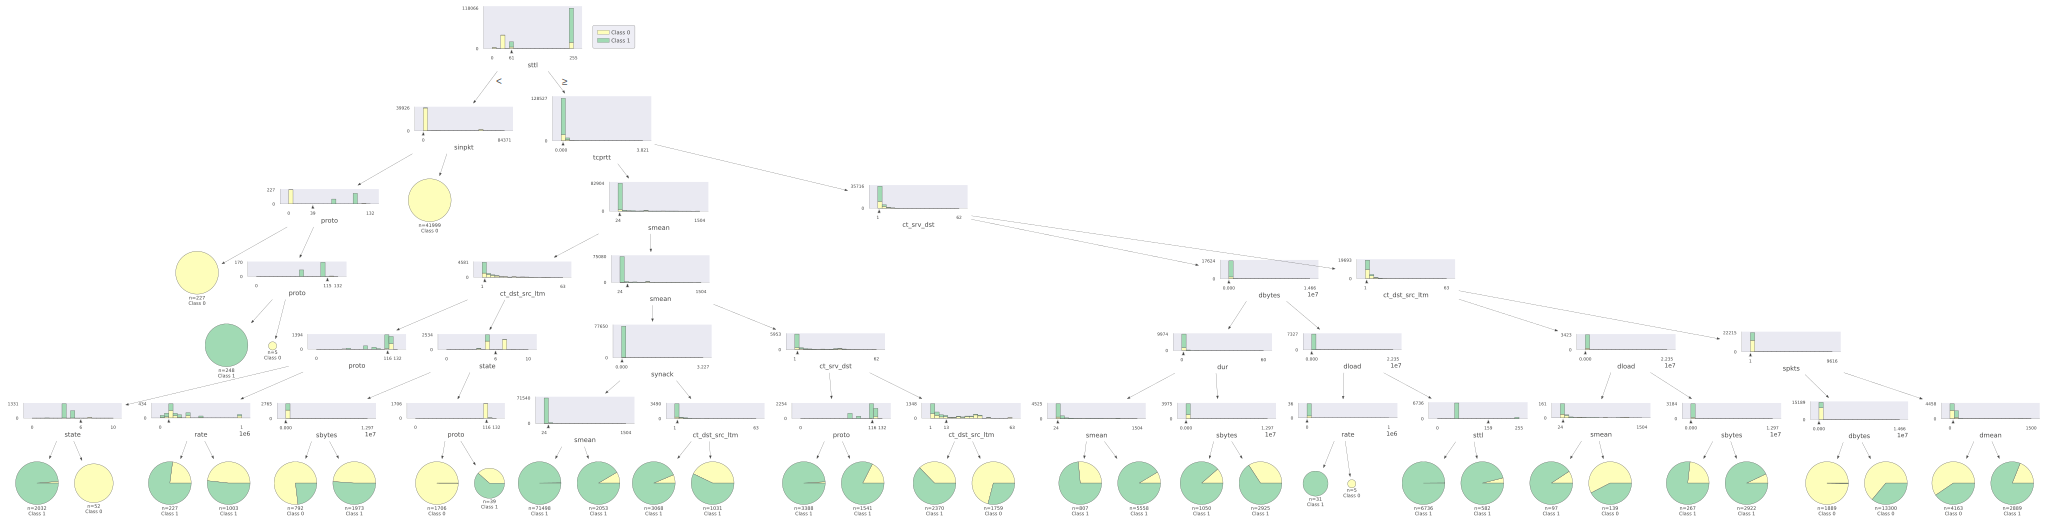

In [26]:
viz_model = dtreeviz.model(xgbc,tree_index=1,
                           X_train=X_train, y_train=y_train,
                           feature_names=feature_names)
viz_model.view()

In [27]:
!pip install lightgbm

[LightGBM] [Info] Number of positive: 115185, number of negative: 65186
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6184
[LightGBM] [Info] Number of data points in the train set: 180371, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.638600 -> initscore=0.569295
[LightGBM] [Info] Start training from score 0.569295
Recall:  0.9465122858066602
Precision:  0.964898547739211
Accuracy:  0.9267816575515355


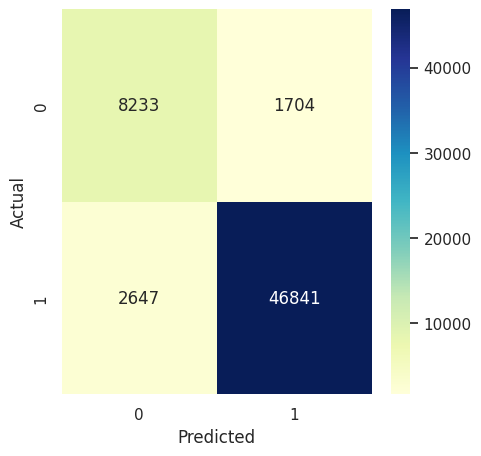

In [28]:
from lightgbm import LGBMClassifier

lgbc = LGBMClassifier()

results['Light GBM Classifier'] = model_evaluation(lgbc)

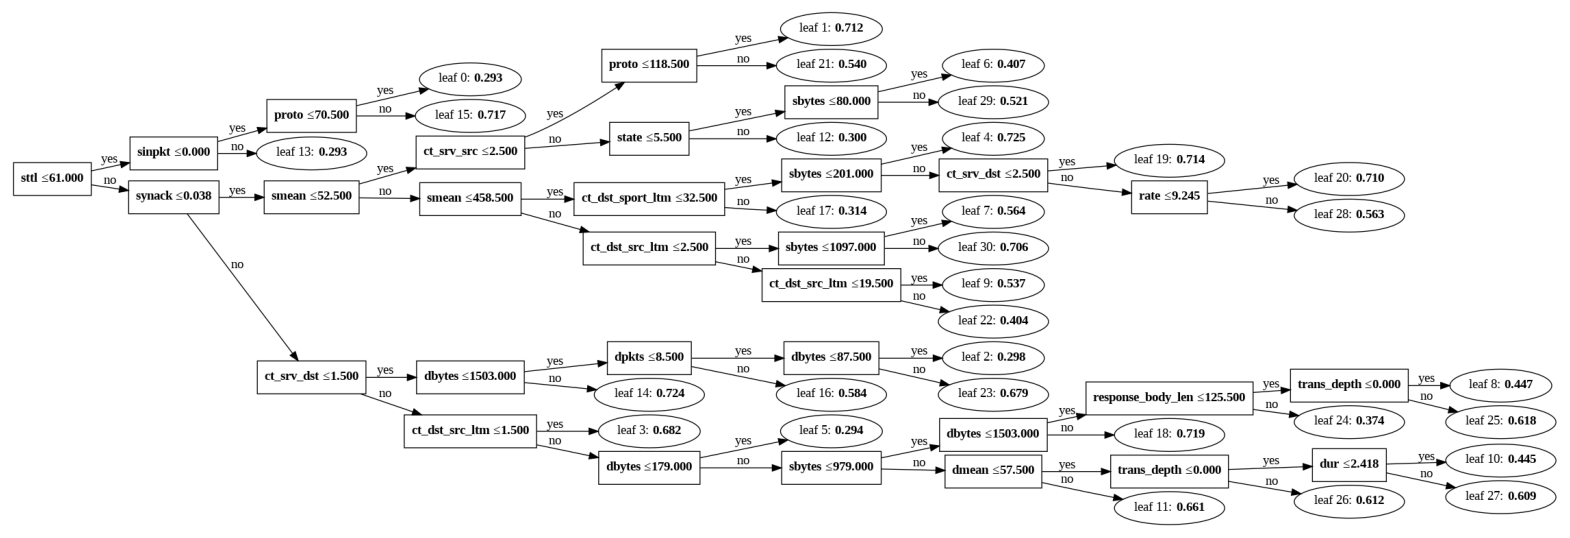

In [29]:
import lightgbm

lightgbm.plot_tree(lgbc,figsize = (20,12))
plt.show()

In [30]:
comparision = pd.DataFrame(results)
comparision

,Random Forest Model,XGBoost Classifier,Light GBM Classifier
Recall,0.957182,0.951281,0.946512


In [31]:
from scipy.stats import wilcoxon

z_statistic, p_value = wilcoxon([comparision.iloc[0][0], comparision.iloc[0][1], comparision.iloc[0][2]])

# Print the results
print('Z-statistic:', z_statistic)
print('p-value:', p_value)

# Interpret the results
if p_value < 0.05:
    print('The difference in the recall of the three models is statistically significant.')
else:
    print('The difference in the recall of the three models is not statistically significant.')

Z-statistic: 0.0
p-value: 0.25
The difference in the recall of the three models is not statistically significant.


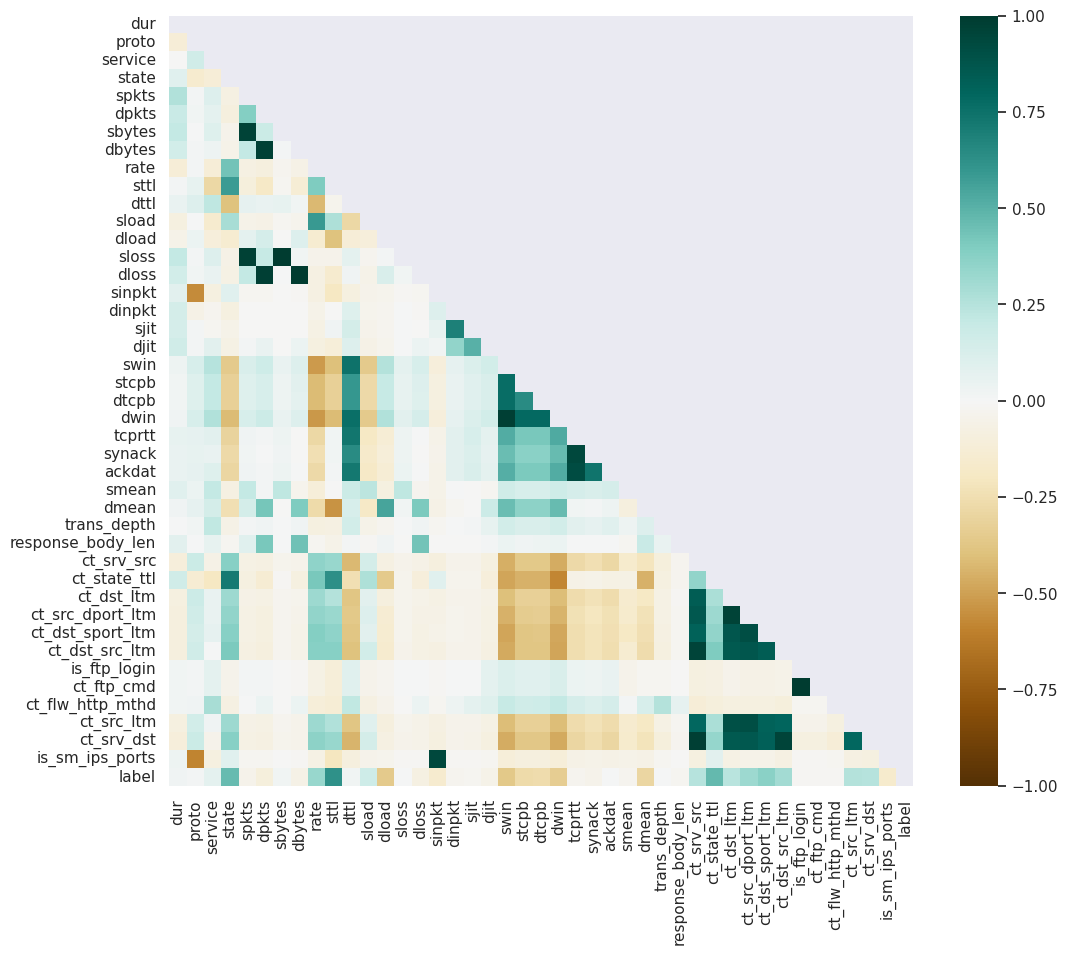

In [32]:
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(),vmin=-1, vmax=1,cmap='BrBG', mask=mask)
plt.show()

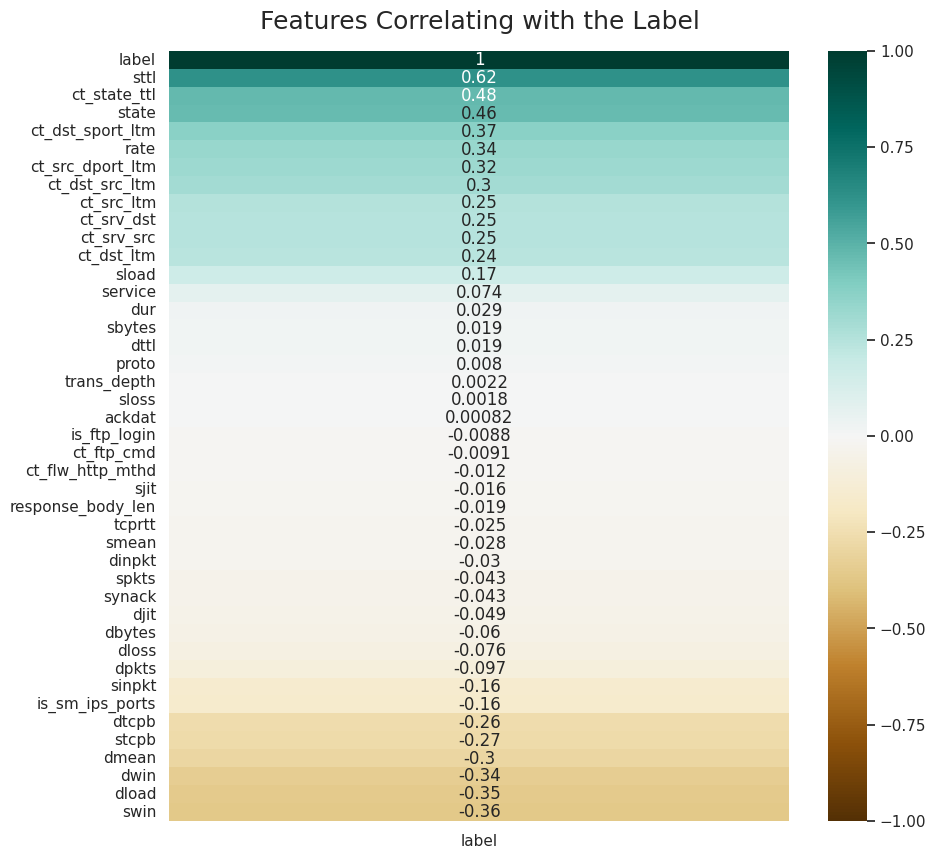

In [33]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(df.corr()[['label']].sort_values(by='label', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with the Label', fontdict={'fontsize':18}, pad=16)
plt.show()

In [34]:
feature_imp = pd.DataFrame({'Name':X.columns, 'Importance':rf.feature_importances_})

feature_imp = feature_imp.sort_values('Importance',ascending=False).reset_index(drop=True)

feature_imp[:10].style.background_gradient()

,Name,Importance
0,sttl,0.127183
1,ct_state_ttl,0.098745
2,rate,0.056321
3,dload,0.049838
4,sload,0.045773
5,sbytes,0.043195
6,ct_srv_dst,0.040537
7,smean,0.039754
8,ct_dst_src_ltm,0.038934
9,tcprtt,0.033016


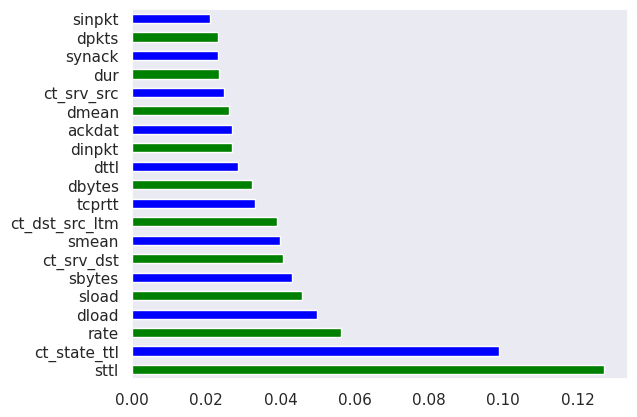

In [35]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh',color=['g','b']*5)
plt.show()

In [36]:
top10= feature_imp.Name[:10].tolist()
top10

['sttl',
 'ct_state_ttl',
 'rate',
 'dload',
 'sload',
 'sbytes',
 'ct_srv_dst',
 'smean',
 'ct_dst_src_ltm',
 'tcprtt']

In [38]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # will plot the confusion matrix
import time
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','time to train','time to predict','total time'])


In [39]:
%%time
from sklearn.linear_model import LogisticRegression
start = time.time()
model = LogisticRegression().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 1.35 s, sys: 625 ms, total: 1.97 s
Wall time: 1.06 s


In [40]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Logistic'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 73.45%
Recall: 73.45%
Precision: 75.99%
F1-Score: 73.95%
time to train: 1.05 s
time to predict: 0.01 s
total: 1.06 s


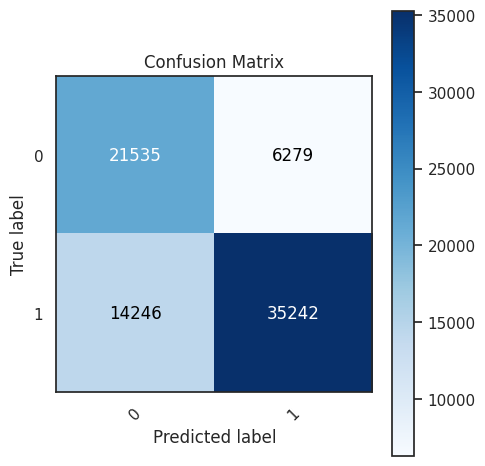

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Assuming 'model', 'X_test', and 'y_test' are defined
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
class_names = [str(i) for i in range(len(np.unique(y_test)))]

plt.rcParams['figure.figsize'] = 5, 5
sns.set_style("white")
plot_confusion_matrix(cm, class_names)
plt.show()


In [42]:
%%time
from sklearn.neighbors import KNeighborsClassifier
start = time.time()
model = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 5.22 s, sys: 237 ms, total: 5.45 s
Wall time: 5.34 s


In [43]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['kNN'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 90.87%
Recall: 90.87%
Precision: 90.87%
F1-Score: 90.87%
time to train: 0.44 s
time to predict: 4.90 s
total: 5.34 s


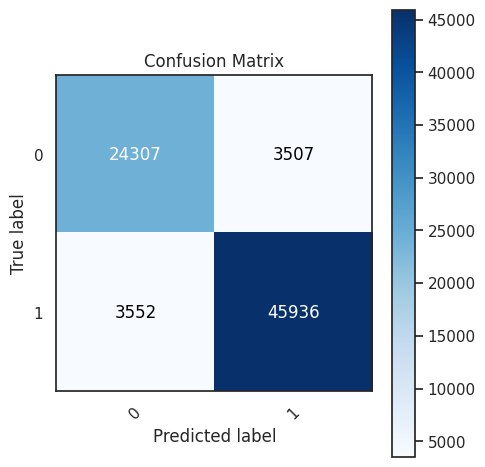

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Assuming 'model', 'X_test', and 'y_test' are defined
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
class_names = [str(i) for i in range(len(np.unique(y_test)))]

plt.rcParams['figure.figsize'] = 5, 5
sns.set_style("white")
plot_confusion_matrix(cm, class_names)
plt.show()


In [45]:
%%time
from sklearn.tree import DecisionTreeClassifier
start = time.time()
model = DecisionTreeClassifier().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 1.17 s, sys: 5.01 ms, total: 1.18 s
Wall time: 1.18 s


In [46]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Decision Tree'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 93.24%
Recall: 93.24%
Precision: 93.25%
F1-Score: 93.25%
time to train: 1.16 s
time to predict: 0.02 s
total: 1.18 s


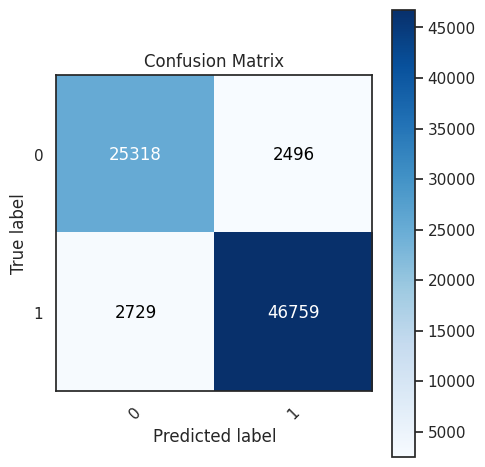

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Assuming 'model', 'X_test', and 'y_test' are defined
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
class_names = [str(i) for i in range(len(np.unique(y_test)))]

plt.rcParams['figure.figsize'] = 5, 5
sns.set_style("white")
plot_confusion_matrix(cm, class_names)
plt.show()


In [48]:
%%time
from sklearn.ensemble import ExtraTreesClassifier
start = time.time()
model = ExtraTreesClassifier(random_state=0,n_jobs=-1).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 22.8 s, sys: 546 ms, total: 23.4 s
Wall time: 13.7 s


In [49]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Extra Trees'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 94.21%
Recall: 94.21%
Precision: 94.21%
F1-Score: 94.21%
time to train: 12.50 s
time to predict: 1.24 s
total: 13.74 s


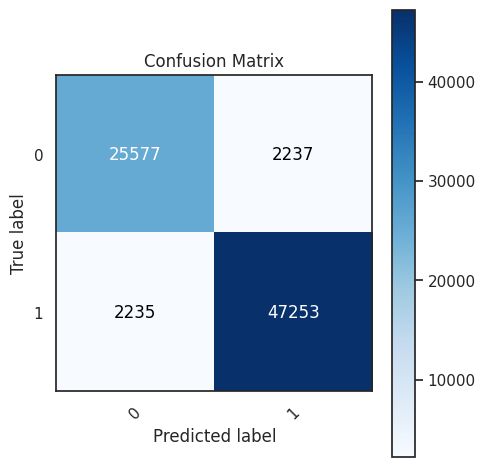

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Assuming 'model', 'X_test', and 'y_test' are defined
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
class_names = [str(i) for i in range(len(np.unique(y_test)))]

plt.rcParams['figure.figsize'] = 5, 5
sns.set_style("white")
plot_confusion_matrix(cm, class_names)
plt.show()


In [51]:
%%time
from sklearn.ensemble import RandomForestClassifier
start = time.time()
model = RandomForestClassifier(n_estimators = 100,n_jobs=-1,random_state=0,bootstrap=True,).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 44.5 s, sys: 266 ms, total: 44.8 s
Wall time: 26.3 s


In [52]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

In [53]:
print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Random Forest'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 94.44%
Recall: 94.44%
Precision: 94.44%
F1-Score: 94.44%
time to train: 25.29 s
time to predict: 1.02 s
total: 26.31 s


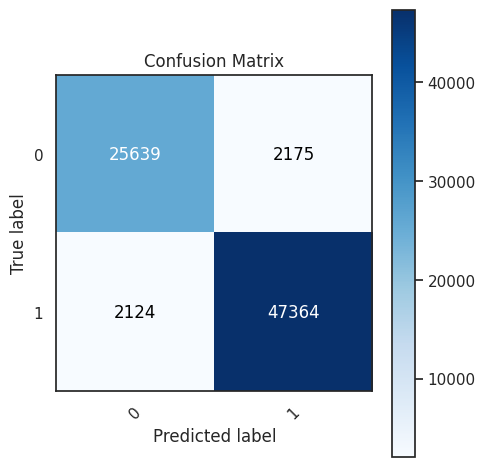

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Assuming 'model', 'X_test', and 'y_test' are defined
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
class_names = [str(i) for i in range(len(np.unique(y_test)))]

plt.rcParams['figure.figsize'] = 5, 5
sns.set_style("white")
plot_confusion_matrix(cm, class_names)
plt.show()


In [55]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
start = time.time()
model = GradientBoostingClassifier().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 41.3 s, sys: 60.5 ms, total: 41.3 s
Wall time: 41.4 s


In [56]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Gradient Boosting Classifier'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 92.77%
Recall: 92.77%
Precision: 92.74%
F1-Score: 92.75%
time to train: 41.25 s
time to predict: 0.15 s
total: 41.40 s


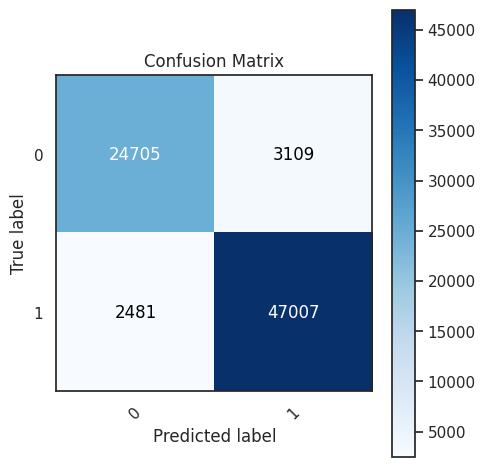

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Assuming 'model', 'X_test', and 'y_test' are defined
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
class_names = [str(i) for i in range(len(np.unique(y_test)))]

plt.rcParams['figure.figsize'] = 5, 5
sns.set_style("white")
plot_confusion_matrix(cm, class_names)
plt.show()


In [58]:
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score,time to train,time to predict,total time
Logistic,73.45%,73.45%,75.99%,73.95%,1.1,0.0,1.1
kNN,90.87%,90.87%,90.87%,90.87%,0.4,4.9,5.3
Decision Tree,93.24%,93.24%,93.25%,93.25%,1.2,0.0,1.2
Extra Trees,94.21%,94.21%,94.21%,94.21%,12.5,1.2,13.7
Random Forest,94.44%,94.44%,94.44%,94.44%,25.3,1.0,26.3
Gradient Boosting Classifier,92.77%,92.77%,92.74%,92.75%,41.2,0.2,41.4


In [59]:
pip install XlsxWriter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 2.3 MB/s eta 0:00:00


In [60]:
import pandas as pd

# Assuming you have a DataFrame named model_performance

styled_df = model_performance.style.background_gradient(cmap='coolwarm').format({
    'Accuracy': '{:.2%}',
    'Precision': '{:.2%}',
    'Recall': '{:.2%}',
    'F1-Score': '{:.2%}',
    'time to train': '{:.1f}',
    'time to predict': '{:.1f}',
    'total time': '{:.1f}',
})

# Save the styled DataFrame to an Excel file with color codes
output_excel_path = 'Result-FeatureSet2-TrainingSet100.xlsx'
with pd.ExcelWriter(output_excel_path, engine='xlsxwriter') as writer:
    styled_df.to_excel(writer, sheet_name='Sheet1', index=False)

# Access the xlsxwriter workbook and worksheet objects
workbook = writer.book
worksheet = writer.sheets['Sheet1']

# Get the xlsxwriter Style object from the Pandas Styler
pandas_styler = styled_df.to_excel(writer, sheet_name='Sheet1', index=False)
xf = pandas_styler
df = model_performance

# Use the XlsxWriter `apply()` method to customize the column widths
column_settings = [{'header': column} for column in df.columns]
worksheet.add_table(0, 0, df.shape[0], df.shape[1] - 1, {'columns': column_settings})

for idx, column in enumerate(df.columns):
    series = df[column]
    max_len = max((
        series.astype(str).map(len).max(),  # len of largest item
        len(str(column))  # len of column name/header
        )) + 1  # adding a little extra space

    worksheet.set_column(idx, idx, max_len)  # set column width

    # center align the header cells
    worksheet.write(0, idx, column, xf)

output_excel_path

'Result-FeatureSet2-TrainingSet100.xlsx'